## <span style="color:brown"> Python Exercise 11 </span>
### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

Le reti di cui trattiamo sono reti supervisionate, ovvero si cerca di costruire un modello e quindi i suoi parametri, a partire da un data set di training, con il quale si vuole fare previsioni su dati. 

Il neurone è l'unità base d una rete neurale, si tratta di un oggette che ha in ingresso diversi input $x_1,\dots,x_N$ e ad ogni input assegna un peso $w_1 \dots w_N$, ovvero numeri reali che esprimono l'importanza dell'input rispetto all'output. Definisce a questo punto una variabile somma su tutti gli input $net=\sum_{i=0}^{N}w_ix_i$. Nel caso di un perceptron l'output del neurono sarà o $0$ o $1$ a seconda che $net-b$ sia minore o maggiore $0$. Dove $b$ è chiamato *bias* che di fatto è una misura di quanto facilmente un certo neurone si attiva (anch'esso è un parametro del neurone).Se vogliamo invece che l'apprendimento sia tale, occorre a volte considerare delle funzioni di attivazioni più complesse, infatti un piccolo cambiamento dei pesi e dei bias con dei perceptrons potrebbe portare ad un output completamente diverso. 

Una rete consite in un insieme di ingressi (input layer), uno o più strati nascosti di neuroni (hidden layers) e un insieme di neuroni in uscita (output layer).  

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Proprio per come è definito un neurone perceptrone si può pensare che esso sia in grado di eseguire un fit lineare ovvero, se ho un solo input in entrate esso equivale ad un semplice modello di regressione: $wx+b$.

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

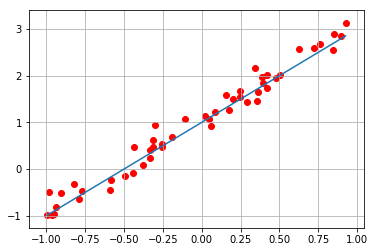

In [31]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect


import numpy as np

# generate training inputs


np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [32]:
# compose the NN model
from math import sin

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects


model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Train on 500 samples, validate on 50 samples
Epoch 1/30
500/500 [==============================] - 0s 465us/sample - loss: 1.8840 - mean_squared_error: 1.8840 - val_loss: 1.4741 - val_mean_squared_error: 1.4741
Epoch 2/30
500/500 [==============================] - 0s 33us/sample - loss: 1.3263 - mean_squared_error: 1.3263 - val_loss: 1.0648 - val_mean_squared_error: 1.0648
Epoch 3/30
500/500 [==============================] - 0s 37us/sample - loss: 0.9732 - mean_squared_error: 0.9732 - val_loss: 0.7943 - val_mean_squared_error: 0.7943
Epoch 4/30
500/500 [==============================] - 0s 58us/sample - loss: 0.7358 - mean_squared_error: 0.7358 

50/50 [==============================] - 0s 77us/sample - loss: 0.0454 - mean_squared_error: 0.0454

Test loss: 0.04544945299625397
Test accuracy 0.04544945
50/50 [==============================] - 0s 61us/sample - loss: 0.0013 - mean_squared_error: 0.0013 

Test loss: 0.0012672064267098904
Test accuracy: 0.0012672065


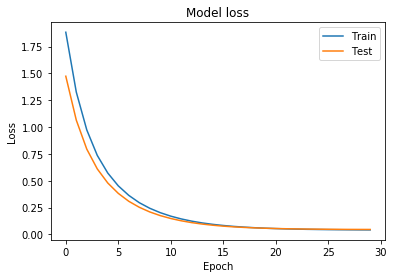

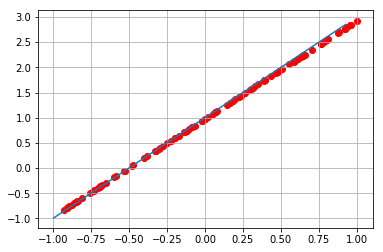

In [33]:
# return weights
model.get_weights()

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()


x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Si nota come sia l'aumento del numero di epoche così come l'aumento del numero di dati di train migliorano i risultati dell'operazion. Tuttavia, l'aumento del numero dei dati di training è il parametro che maggiormente influenza e migliora l'apprendimento, per un numero di epoche sufficientemente grande. Infatti, andando a guardare la funzione costo si nota come dopo un certo numero di epoche il model loss tende a rimanere costante cioè la rete non riesce più ad imparare. Si noti invece che grandi valori di sigma, ovvero grande rumore, determina una diminuizione della capacità di apprendimento.


I risultati ottenuti sono stati infatti ottenuti solamente cambiando, rispetto al codice originale, il numero di punti di training $N_t=500$, il numero di punti di validation $N_v=50$, che in genere si impone essere $1/10$ dei punti di training, e infine il rumore sui data con $\sigma=0.2$.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.


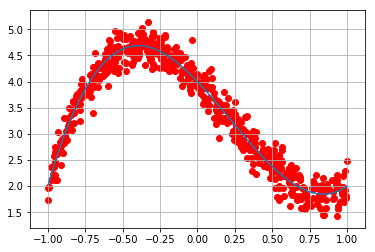

In [34]:

def poli3(x):
  return 4.-3.*x-2.*(x)**2+3*x**3

np.random.seed(0)
x_train = np.random.uniform(-1., 1., 6000)
x_valid = np.random.uniform(-1., 1., 600)
x_valid.sort()
y_target = poli3(x_valid)

sigma = 0.2 ##noise
y_train = np.random.normal(poli3(x_train), sigma)
y_valid = np.random.normal(poli3(x_valid), sigma)

plt.figure()
plt.plot(x_valid,y_target)
plt.scatter(x_valid, y_valid, color = 'r')
plt.grid(True)
plt.show()



In [35]:
model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(1,), activation='tanh'))#numero di neuroni nel primo "hidden layer" e 1 parametro di input
model.add(Dense(25, activation='tanh'))
model.add(Dense(50, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

history = model.fit(x=x_train, y=y_train, batch_size=50, epochs=100, shuffle=True,validation_data=(x_valid,y_valid))



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_25 (Dense)             (None, 25)                275       
_________________________________________________________________
dense_26 (Dense)             (None, 50)                1300      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 51        
Total params: 1,646
Trainable params: 1,646
Non-trainable params: 0
_________________________________________________________________
Train on 6000 samples, validate on 600 samples
Epoch 1/100
6000/6000 [==============================] - 0s 62us/sample - loss: 0.9800 - mean_squared_error: 0.9800 - val_loss: 0.3561 - val_mean_squared_error: 0.3561
Epoch 2/100
6000/6000 [============

6000/6000 [==============================] - 0s 31us/sample - loss: 0.0437 - mean_squared_error: 0.0437 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 45/100
6000/6000 [==============================] - 0s 41us/sample - loss: 0.0436 - mean_squared_error: 0.0436 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 46/100
6000/6000 [==============================] - 0s 35us/sample - loss: 0.0436 - mean_squared_error: 0.0436 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 47/100
6000/6000 [==============================] - 0s 19us/sample - loss: 0.0435 - mean_squared_error: 0.0435 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 48/100
6000/6000 [==============================] - 0s 20us/sample - loss: 0.0433 - mean_squared_error: 0.0433 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 49/100
6000/6000 [==============================] - 0s 18us/sample - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 0.0446 - val_mean_squared_error: 0.0446

6000/6000 [==============================] - 0s 20us/sample - loss: 0.0413 - mean_squared_error: 0.0413 - val_loss: 0.0436 - val_mean_squared_error: 0.0436
Epoch 93/100
6000/6000 [==============================] - 0s 25us/sample - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 94/100
6000/6000 [==============================] - 0s 27us/sample - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 95/100
6000/6000 [==============================] - 0s 23us/sample - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 96/100
6000/6000 [==============================] - 0s 19us/sample - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.0426 - val_mean_squared_error: 0.0426
Epoch 97/100
6000/6000 [==============================] - 0s 18us/sample - loss: 0.0413 - mean_squared_error: 0.0413 - val_loss: 0.0433 - val_mean_squared_error: 0.0433

600/600 [==============================] - 0s 13us/sample - loss: 0.0440 - mean_squared_error: 0.0440

Test loss: 0.043965997795263924
Test Accuracy: 0.043966
600/600 [==============================] - 0s 14us/sample - loss: 0.0025 - mean_squared_error: 0.0025

Test loss: 0.002505619941681895
Test Accuracy: 0.00250562


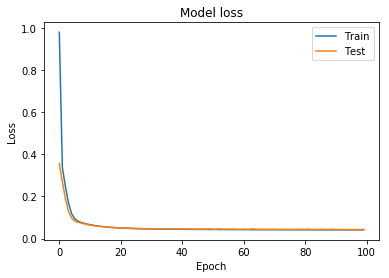

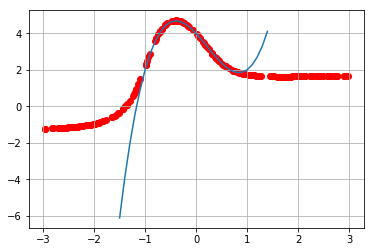

In [36]:
score = model.evaluate(x_valid, y_valid, batch_size=50,verbose=1)

print()
print('Test loss:', score[0])
print('Test Accuracy:',score[1])

score = model.evaluate(x_valid, y_target, batch_size=50,verbose=1)

print()
print('Test loss:', score[0])
print('Test Accuracy:',score[1])


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best'); plt.show()


x_new=np.arange(-1.5,1.5,0.1)
x_predicted = np.random.uniform(-3, 3, 200)
y_predicted = model.predict(x_predicted)

y_new = poli3(x_new)

plt.scatter(x_predicted, y_predicted,color='r')
x_predicted.sort()
plt.plot(x_new, y_new)
plt.grid(True);plt.show()


plt.show()

Sebbene la funzione sia un polinomio di grado $3$ e quindi ci si aspetterebbe che bastino soltanto $4$ parametri in realtà la rete ha bisogno di molti più parametri a causa della non linearità della funzione. Aumentare il numero di parametri significa inserire un maggior numero di neuroni e di layers e sicuramente aiuta a fittare la curva tuttavia si ha il rischio di un overfitting, ovvero dell'aggiunta d troppi parametri. E' evidente che gioca un ruolo molto importante la funzione di attivazione, infatti lavorando con lo stesso numeri di neuroni e funzioni di attivazione diverse si nota come la funzione *Relu* non sia in grado di generare delle curve lisce, a differenza invece della *sigmoide* o della *tanh*. D'altra parte la *sigmoide* essendo una funzione più soft non riesce bene a seguire bene le variazioni della funzione. Nell'esercizio si sono utilizzati dei layers con funzione di attivazione *tanh*.


Infine si nota come il modello si adatti bene solamente alla regione di dati su cui è avvenuto il training perdendo totalmente potere predittivo per dati fuori dal range: $[-1,1]$.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [37]:
from mpl_toolkits.mplot3d import Axes3D
from math import sin

n_train=5000
n_valid=500


x_valid=np.zeros((n_valid,2))
x_train=np.zeros((n_train,2))
z_valid=np.zeros(n_valid)
z_target=np.zeros(n_valid)
z_train=np.zeros(n_train)

np.random.seed(0)


sigma=0.2
for i in range(n_valid):
    x_valid[i,0] = np.random.uniform(-3./2, 3./2.)
    x_valid[i,1] = np.random.uniform(-3./2, 3./2.)
    z_target[i] = sin(x_valid[i,0]**2+x_valid[i,1]**2)
    z_valid[i] =  np.random.normal(np.sin(x_valid[i,0]**2+x_valid[i,1]**2), sigma)

    
for i in range(n_train): 
    x_train[i,0] = np.random.uniform(-3./2, 3./2.)
    x_train[i,1] = np.random.uniform(-3./2, 3./2.)
    z_train[i] =  np.random.normal(sin(x_train[i,0]**2+x_train[i,1]**2), sigma)



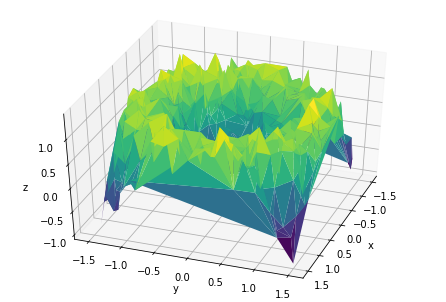

In [38]:

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(x_valid[:,0],x_valid[:,1], z_valid, cmap='viridis', edgecolor = 'none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(40,20)
plt.show()

In [39]:
model = tf.keras.Sequential()
model.add(Dense(12, input_shape=(2,), activation='relu'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='relu'))


In [40]:
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
#sgd = optimizers.SGD(lr=0.01, decay = 1e-6, momentum=0.9, nesterov=True)
#keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

history = model.fit(x=x_train, y=z_train, batch_size=50, epochs=100, shuffle=True,validation_data=(x_valid,z_valid))


Train on 5000 samples, validate on 500 samples
Epoch 1/100
5000/5000 [==============================] - 0s 90us/sample - loss: 0.2168 - mean_squared_error: 0.2168 - val_loss: 0.2001 - val_mean_squared_error: 0.2001
Epoch 2/100
5000/5000 [==============================] - 0s 27us/sample - loss: 0.1798 - mean_squared_error: 0.1798 - val_loss: 0.1951 - val_mean_squared_error: 0.1951
Epoch 3/100
5000/5000 [==============================] - 0s 25us/sample - loss: 0.1769 - mean_squared_error: 0.1769 - val_loss: 0.1919 - val_mean_squared_error: 0.1919
Epoch 4/100
5000/5000 [==============================] - 0s 45us/sample - loss: 0.1746 - mean_squared_error: 0.1746 - val_loss: 0.1899 - val_mean_squared_error: 0.1899
Epoch 5/100
5000/5000 [==============================] - 0s 46us/sample - loss: 0.1724 - mean_squared_error: 0.1724 - val_loss: 0.1877 - val_mean_squared_error: 0.1877
Epoch 6/100
5000/5000 [==============================] - 0s 44us/sample - loss: 0.1703 - mean_squared_error: 0.17

5000/5000 [==============================] - 0s 41us/sample - loss: 0.0604 - mean_squared_error: 0.0604 - val_loss: 0.0634 - val_mean_squared_error: 0.0634
Epoch 50/100
5000/5000 [==============================] - 0s 46us/sample - loss: 0.0599 - mean_squared_error: 0.0599 - val_loss: 0.0634 - val_mean_squared_error: 0.0634
Epoch 51/100
5000/5000 [==============================] - 0s 30us/sample - loss: 0.0594 - mean_squared_error: 0.0594 - val_loss: 0.0627 - val_mean_squared_error: 0.0627
Epoch 52/100
5000/5000 [==============================] - 0s 31us/sample - loss: 0.0591 - mean_squared_error: 0.0591 - val_loss: 0.0624 - val_mean_squared_error: 0.0624
Epoch 53/100
5000/5000 [==============================] - 0s 48us/sample - loss: 0.0587 - mean_squared_error: 0.0587 - val_loss: 0.0618 - val_mean_squared_error: 0.0618
Epoch 54/100
5000/5000 [==============================] - 0s 31us/sample - loss: 0.0585 - mean_squared_error: 0.0585 - val_loss: 0.0621 - val_mean_squared_error: 0.0621

5000/5000 [==============================] - 0s 30us/sample - loss: 0.0539 - mean_squared_error: 0.0539 - val_loss: 0.0577 - val_mean_squared_error: 0.0577
Epoch 98/100
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0539 - mean_squared_error: 0.0539 - val_loss: 0.0574 - val_mean_squared_error: 0.0574
Epoch 99/100
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0539 - mean_squared_error: 0.0539 - val_loss: 0.0573 - val_mean_squared_error: 0.0573
Epoch 100/100
5000/5000 [==============================] - 0s 26us/sample - loss: 0.0539 - mean_squared_error: 0.0539 - val_loss: 0.0572 - val_mean_squared_error: 0.0572


500/500 [==============================] - 0s 26us/sample - loss: 0.0572 - mean_squared_error: 0.0572

Test loss: 0.05721936635673046
Test Accuracy: 0.05721936
500/500 [==============================] - 0s 26us/sample - loss: 0.0188 - mean_squared_error: 0.0188

Test loss: 0.018788602808490394
Test Accuracy: 0.018788602


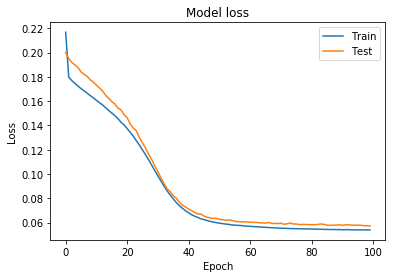

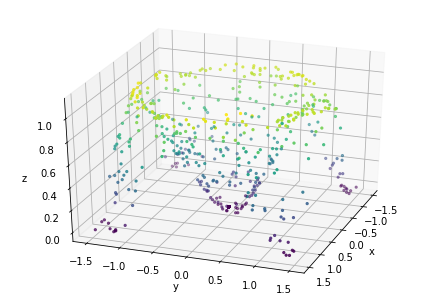

In [41]:
score = model.evaluate(x_valid, z_valid, batch_size=50,verbose=1)

print()
print('Test loss:', score[0])
print('Test Accuracy:',score[1])

score = model.evaluate(x_valid, z_target, batch_size=50,verbose=1)

print()
print('Test loss:', score[0])
print('Test Accuracy:',score[1])





plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best'); plt.show()

x_new=np.zeros((2000,2))
z_new=np.zeros(2000)



for i in range(n_valid):
    x_new[i,0] = np.random.uniform(-3./2, 3./2.)
    x_new[i,1] = np.random.uniform(-3./2, 3./2.)

z_new = model.predict(x_new)
    
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_new[:,0],x_new[:,1], z_new, c=z_new[:,0], marker = '.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30,20)
plt.show()


